In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
df = pd.read_csv('Math_preprocessed.csv')

In [39]:
df.head()

,Medu,Fedu,studytime,famrel,school_GP,sex_M,address_U,famsize_LE3,Pstatus_A,Mjob_health,...,guardian_father,schoolsup_no,famsup_no,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_no,Grade
0,1.00,1.00,0.333333,0.75,1,0,1,0,1,0,...,0,0,1,0,0,1,1,0,1,5.666667
1,0.25,0.25,0.333333,1.00,1,0,1,0,0,0,...,1,1,0,0,0,0,1,1,1,5.333333
2,0.25,0.25,0.333333,0.75,1,0,1,1,0,0,...,0,0,1,1,0,1,1,1,1,8.333333
3,1.00,0.50,0.666667,0.50,1,0,1,0,0,1,...,0,1,0,1,1,1,1,1,0,14.666667
4,0.75,0.75,0.333333,0.75,1,0,1,0,0,0,...,1,1,0,1,0,1,1,0,1,8.666667


In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [41]:
X = df.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,Medu,18.021575
1,Fedu,12.192995
2,studytime,3.146521
3,famrel,10.690793
4,school_GP,9.637101
5,sex_M,2.398549
6,address_U,5.405391
7,famsize_LE3,1.545897
8,Pstatus_A,1.245236
9,Mjob_health,1.545499


In [42]:
var_inf= pd.DataFrame(calc_vif(X))
drop_cols = var_inf.loc[var_inf['VIF']>7]['variables']
t=list(drop_cols)
df1 = df.drop([t[0],t[1],t[2],t[3],t[4],t[5]],axis = 1)
df1.head()

,studytime,sex_M,address_U,famsize_LE3,Pstatus_A,Mjob_health,Mjob_services,Mjob_teacher,Fjob_health,Fjob_teacher,reason_other,reason_reputation,guardian_father,famsup_no,paid_yes,activities_yes,nursery_yes,internet_yes,romantic_no,Grade
0,0.333333,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,5.666667
1,0.333333,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,5.333333
2,0.333333,0,1,1,0,0,0,0,0,0,1,0,0,1,1,0,1,1,1,8.333333
3,0.666667,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,14.666667
4,0.333333,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,8.666667


In [43]:
#Identify input and target columns
input_cols,target_cols=df1.columns[:-1],df1.columns[-1]
input_df,targets=df1[input_cols].copy(),df1[target_cols].copy()

In [44]:
X_train,X_test,y_train,y_test=train_test_split(input_df,targets,test_size=0.10,random_state=42)

In [45]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_
})
importances = importances.sort_values(by='Importance', ascending=False)

In [46]:
importances

,Attribute,Importance
0,studytime,2.780771
9,Fjob_teacher,1.883496
5,Mjob_health,1.724667
13,famsup_no,1.049935
4,Pstatus_A,0.995007
1,sex_M,0.907709
14,paid_yes,0.815263
6,Mjob_services,0.736957
18,romantic_no,0.717551
11,reason_reputation,0.605346


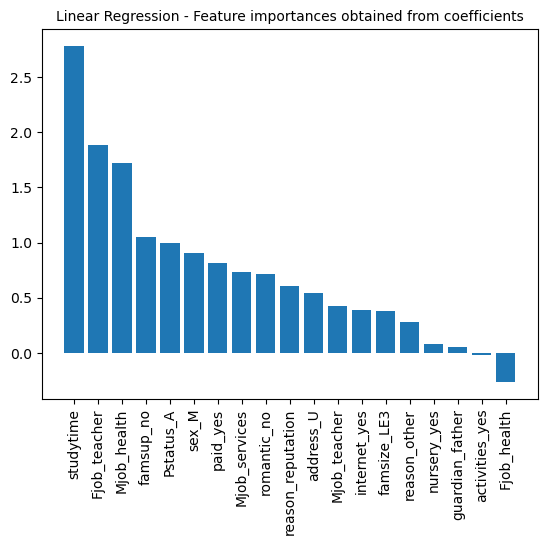

In [47]:
plt.bar(x=importances['Attribute'], height=importances['Importance'])
plt.title('Linear Regression - Feature importances obtained from coefficients', size=10)
plt.xticks(rotation='vertical')
plt.show()

In [30]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

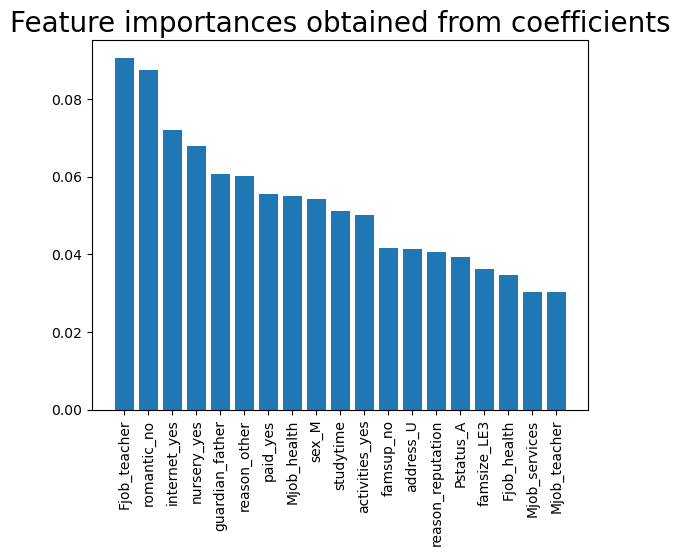

In [31]:
plt.bar(x=importances['Attribute'], height=importances['Importance'])
plt.title('Feature importances obtained from coefficients', size=10)
plt.xticks(rotation='vertical')
plt.show()

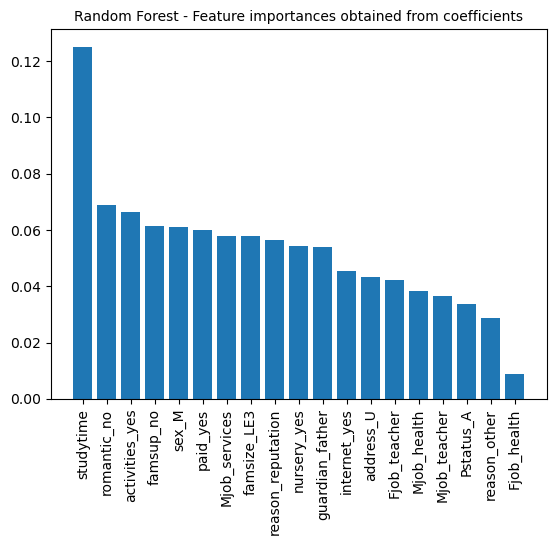

In [51]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
plt.bar(x=importances['Attribute'], height=importances['Importance'])
plt.title('Random Forest - Feature importances obtained from coefficients', size=10)
plt.xticks(rotation='vertical')
plt.show()

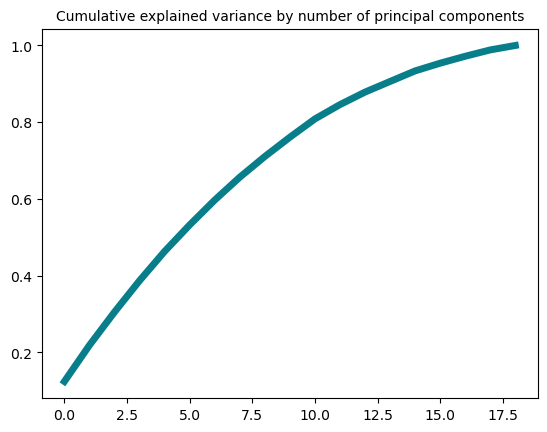

In [25]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_train)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=5, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=10)
plt.show()

In [26]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(X_train.columns) + 1)],
    index=X_train.columns
)
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
studytime,-0.116582,0.002509,-0.066723,0.022117,-0.003364,-0.020371,0.015977,-0.024894,0.012205,-0.002926,-0.018009,0.024486,-0.005356,-0.048735,0.050406,0.205928,-0.009260,0.083577,-0.033962
sex_M,0.275664,0.250933,0.191466,-0.112531,-0.016009,0.076623,-0.039838,0.201571,0.061152,-0.019759,-0.001655,-0.067549,0.027844,-0.033142,0.010512,0.039330,0.008870,0.022692,0.004092
address_U,-0.037887,0.022271,0.150489,0.123493,0.083409,0.153584,0.145227,-0.157291,-0.062748,-0.156748,0.054821,-0.105224,0.115141,-0.018123,-0.023004,0.006265,0.019969,0.012608,-0.000079
famsize_LE3,0.065225,0.113849,0.110493,0.287848,0.095853,-0.194518,0.048665,0.022623,-0.015541,0.132969,0.153956,0.016823,-0.040837,-0.013659,-0.037205,0.002072,0.001454,0.019097,0.003942
Pstatus_A,0.011518,-0.024018,0.028986,0.072844,0.044249,-0.055417,-0.032551,0.046646,-0.031256,-0.031015,0.019788,-0.017816,0.047069,0.121148,0.239264,-0.011971,0.035502,-0.012189,-0.012886
